In [2]:
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data, exposure
import cv2

print("Packages Imported")

Packages Imported


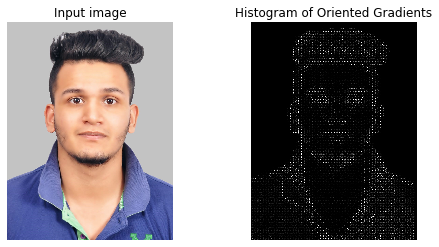

In [3]:
# reading image from disk
img = cv2.imread('ashit_pic.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Feature-descriptor
fd, hog_image = hog(img, orientations=8, pixels_per_cell=(16,16),cells_per_block=(1,1), visualize=True, multichannel=True)

# plot input and hog image
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4), sharex=True, sharey=True)

ax1.axis("off")
ax1.imshow(img, cmap=plt.cm.gray)
ax1.set_title('Input image')

hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis("off")
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

In [4]:
import face_recognition as fcr

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np
import cv2
%matplotlib inline

print("Packages Imported")

Packages Imported


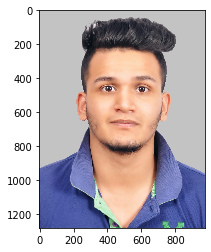

In [5]:
img = cv2.imread('ashit_pic.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)

In [6]:
# finding all the faces in the image
face_locations = fcr.face_locations(img)

no_of_faces = len(face_locations)
print('Found number of faces:', no_of_faces)

Found number of faces: 1


A face is located at Pixel location Top:297, Left:348, Bottom:759, Right:811


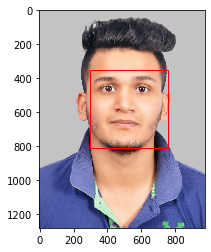

In [7]:
plt.imshow(img)
ax = plt.gca()

# repeats for all faces found
for face_location in face_locations:
    top, right, bottom, left = face_location
    x, y, w, h = left, top, right, bottom
    print("A face is located at Pixel location Top:{}, Left:{}, Bottom:{}, Right:{}".format(x,y,w,h))
        
    # drawing a rectangle box around the face
    rect = Rectangle((x,y), w-x, h-y, fill=False, color='red')
    ax.add_patch(rect)

plt.show()

In [51]:
# Loading the known images
img = cv2.imread('Shoubhik.jpeg')
shoubhik = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img = cv2.imread('ashit_pic2.jpeg')
ashit = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img = cv2.imread('rajeen_pic.jpeg')
rajeen = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print("Done")

Done


In [52]:
# face-encoding for each person

shoubhik_encoding = fcr.face_encodings(shoubhik)[0]
ashit_encoding = fcr.face_encodings(ashit)[0]
rajeen_encoding = fcr.face_encodings(rajeen)[0]

known_face_encodings = [
    shoubhik_encoding,
    ashit_encoding,
    rajeen_encoding
]

print("Done")

Done


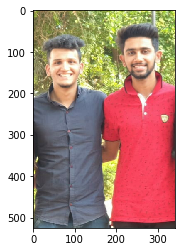

In [53]:
# Loading the image we want to check

img = cv2.imread('Group_pic.jpeg')
unknown_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(unknown_image)

unknown_face_encodings = fcr.face_encodings(unknown_image)

In [54]:
from scipy.spatial import distance

# To loop over more than one face in unknown image
for unknown_face_encoding in unknown_face_encodings:
    results = []
    
    # To check if unknown faces in image matches the known faces in images
    for known_face_encoding in known_face_encodings:
        d= distance.euclidean(known_face_encoding, unknown_face_encoding)
        results.append(d)
    threshold = 0.6
    results = np.array(results) <= threshold
    
    name = "Unknown"
    
    if results[0]:
        name = "Jithin"
    elif results[1]:
        name = "Ashit"
    elif results[2]:
        name = "Rajeen"
        
    print("\n"f"Found {name} in the photo!")


Found Rajeen in the photo!

Found Ashit in the photo!


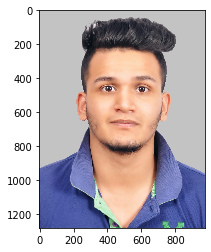

In [55]:
# Facial Landmarks

img = cv2.imread('ashit_pic.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

face_landmarks_list = fcr.face_landmarks(img)

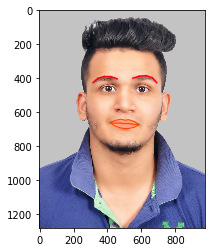

In [56]:
import matplotlib.lines as mlines
from matplotlib.patches import Polygon

plt.imshow(img)
ax = plt.gca()

for face_landmarks in face_landmarks_list:
    
    left_eyebrows_pts = face_landmarks["left_eyebrow"]
    pre_x, pre_y = left_eyebrows_pts[0]
    for (x,y) in left_eyebrows_pts[1:]:
        l = mlines.Line2D([pre_x, x], [pre_y, y], color="red")
        ax.add_line(l)
        pre_x, pre_y = x, y
    
    right_eyebrows_pts = face_landmarks["right_eyebrow"]
    pre_x, pre_y = right_eyebrows_pts[0]
    for (x,y) in right_eyebrows_pts[1:]:
        l = mlines.Line2D([pre_x, x], [pre_y, y], color="red")
        ax.add_line(l)
        pre_x, pre_y = x, y
    p = Polygon(face_landmarks['top_lip'], facecolor='lightsalmon', edgecolor='orangered')
    ax.add_patch(p)
    p = Polygon(face_landmarks['bottom_lip'], facecolor='lightsalmon', edgecolor='orangered')
    ax.add_patch(p)
    
plt.show()